In [2]:
import os
import keras
import pickle
import numpy as np
from tqdm.notebook import tqdm
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from keras.applications.resnet import ResNet50
# from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet101V2

In [23]:
BASE_DIR = 'Images'

In [21]:
features=pickle.load(open('features (4).pkl','rb'))

In [3]:
features=pickle.load(open('features1.pkl','rb'))

In [4]:
mapping=pickle.load(open('mapping.pkl','rb'))

In [5]:
all_captions=pickle.load(open('all_captions.pkl','rb'))

In [6]:
tokenizer=pickle.load(open('tokenizer (1).pkl','rb'))

In [7]:
vocab_size=pickle.load(open('vocab_size.pkl','rb'))

In [8]:
max_length=pickle.load(open('max_length.pkl','rb'))

In [9]:
image_ids=pickle.load(open('image_ids.pkl','rb'))

In [10]:
train=pickle.load(open('train.pkl','rb'))

In [11]:
tokenizer.fit_on_texts(all_captions)
vocab_size=len(tokenizer.word_index)+1

In [13]:
model = keras.models.load_model('best_model (5).h5')

In [14]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [15]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text


In [16]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    #Load the image

    image_id =image_name.split('.')[0]
    img_path=os.path.join(BASE_DIR,image_name)
    image=Image.open(img_path)
    
        #predict the caption
    y_pred=predict_caption(model,features[image_id],tokenizer,max_length)
    print('Predicted')
    print(y_pred)
    plt.imshow(image)
    

Predicted
startseq three dogs are playing in grassy area endseq


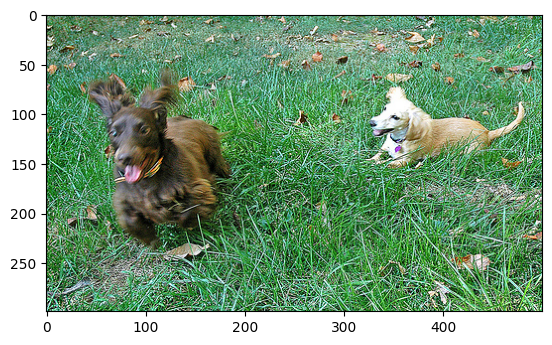

In [25]:
generate_caption('1449625950_fc9a8d02d9.jpg')

Predicted
startseq black dog is jumping into the air to catch ball endseq


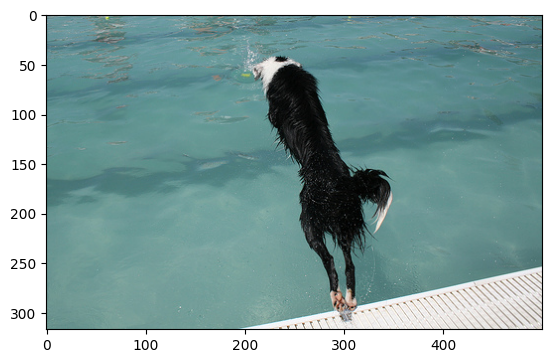

In [26]:
generate_caption('1350948838_fdebe4ff65.jpg')

Predicted
startseq two children are standing on sand endseq


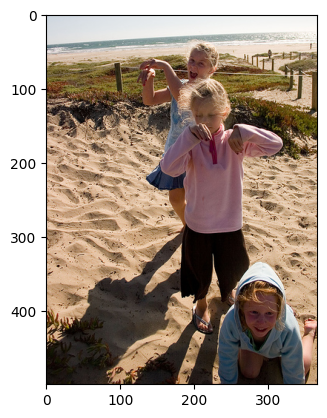

In [27]:
generate_caption('1248940539_46d33ed487.jpg')